In [17]:
import requests
import pandas as pd
import json

import sklearn


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import psycopg2
from sqlalchemy import create_engine 
from dask.diagnostics import ProgressBar
import dask.dataframe as dd
import dask.array as da
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from nltk.stem import WordNetLemmatizer
import re
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
#stop_words = set(stopwords.words('english'))
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline


ModuleNotFoundError: No module named 'sklearn.feature_selection'

import tensorflow as tf
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Problem Statement

Can you predict the type of the complaint based on the given variables?

# Objective

The goal here is to understand what factors contribute most to Complaint Type and create a model that can predict if a certain it. Need to analysis of Independent Variables and then model the algorithm

# Pipeline

1. Clean Data

2. Exploring the data will follow right after and allow further insight of what our dataset contains. 

3. Understanding the relationship each explanatory variable has with the response variable resides here and we can do this with a correlation matrix.

4. Modeling the data will give us our prediction of categorical variable COMPLAINT TYPE

In [108]:
df = dd.read_csv("C:\\EZOIC_ASSESSMENT\\Manhattan.csv",error_bad_lines=False)


In [3]:
df.compute()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek
0,27842670,2014-04-14 08:16:00,2014-04-24 11:15:00,DEP,Department of Environmental Protection,Water System,Hydrant Knocked Over/Missing (WC),NaN,10017,270 PARK AVENUE,...,Unspecified,MANHATTAN,40.755641,-73.975109,"(40.75564086047822, -73.97510913260558)",10.0,10.0,2014,4,0
1,27842682,2014-04-14 11:38:00,2014-04-15 03:45:00,DEP,Department of Environmental Protection,Water System,No Water/Low Pressure (WA5),NaN,10009,278 EAST 10 STREET,...,Unspecified,MANHATTAN,40.728225,-73.983158,"(40.72822500217204, -73.98315795150333)",0.0,0.0,2014,4,0
2,27842683,2014-04-14 15:13:00,2014-04-21 12:00:00,DEP,Department of Environmental Protection,Air Quality,"Air: Smoke, Vehicular (AA4)",NaN,10003,101 EAST 16 STREET,...,Unspecified,MANHATTAN,40.735867,-73.989153,"(40.73586711990034, -73.98915316963569)",6.0,6.0,2014,4,0
3,27842693,2014-04-14 00:00:00,2014-04-22 00:00:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10162,500 EAST 77 STREET,...,Unspecified,MANHATTAN,40.769974,-73.951186,"(40.769974489179866, -73.95118592429507)",8.0,8.0,2014,4,0
4,27842714,2014-04-14 08:59:00,2014-04-14 12:00:00,DSNY,Manhattan 01,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10013,91 FRANKLIN STREET,...,Unspecified,MANHATTAN,40.718098,-74.004964,"(40.718097970057514, -74.0049638254782)",0.0,0.0,2014,4,0
5,27842726,2014-04-14 07:09:00,2014-04-14 12:00:00,DSNY,Manhattan 02,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10011,78 5 AVENUE,...,Unspecified,MANHATTAN,40.735711,-73.993840,"(40.73571101507024, -73.99384048701876)",0.0,0.0,2014,4,0
6,27842782,2014-04-14 14:32:00,2014-04-14 15:33:00,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,10004,17 STATE STREET,...,Unspecified,MANHATTAN,40.703152,-74.014430,"(40.70315194054949, -74.01443009679454)",0.0,0.0,2014,4,0
7,27842813,2014-04-14 00:00:00,2014-04-23 00:00:00,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10026,314 WEST 115 STREET,...,Unspecified,MANHATTAN,40.803954,-73.956380,"(40.803953620795205, -73.95638046816835)",9.0,9.0,2014,4,0
8,27842816,2014-04-14 00:00:00,2014-05-01 00:00:00,HPD,Department of Housing Preservation and Develop...,APPLIANCE,REFRIGERATOR,RESIDENTIAL BUILDING,10011,249 WEST 21 STREET,...,Unspecified,MANHATTAN,40.743407,-73.997975,"(40.74340744589288, -73.9979754622382)",17.0,17.0,2014,4,0
9,27842821,2014-04-14 00:00:00,2014-04-18 00:00:00,HPD,Department of Housing Preservation and Develop...,PLUMBING,RADIATOR,RESIDENTIAL BUILDING,10009,435 EAST 9 STREET,...,Unspecified,MANHATTAN,40.727627,-73.983515,"(40.727626697028455, -73.9835152894863)",4.0,4.0,2014,4,0


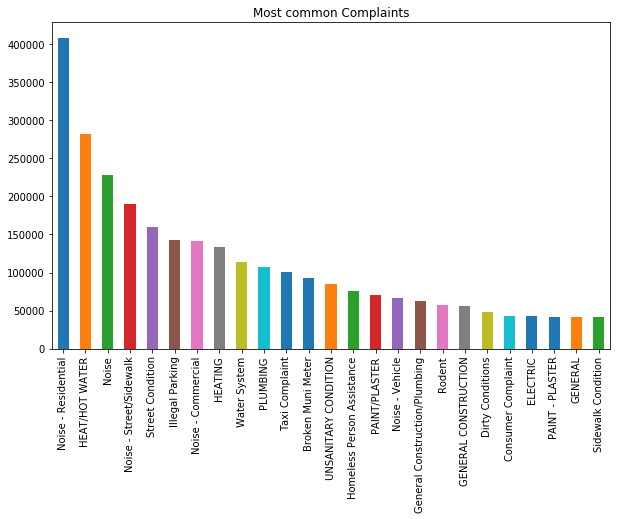

In [4]:
(df['Complaint Type'].value_counts()).head(25).plot(kind='bar',figsize=(10,6), title = 'Most common Complaints')

### Applying Lemmitization for Resolution Description Ex: cats --> cat

In [5]:
pd.set_option('display.max_colwidth', -1)
resdes = df['Resolution Description'].unique()
resdes.unique().compute().to_frame()

,Resolution Description
0,The Department of Environmental Protection investigated this complaint and repaired or replaced the hydrant.
1,"The Department of Environment Protection inspected your complaint but could not find the problem you reported. If the condition persists, please call 311 (or 212-639-9675 if calling from a non-New York City area code) with more detailed information to submit a new complaint."
2,"The Department of Environmental Protection did not observe a violation of the New York City Air/Noise Code at the time of inspection and could not issue a notice of violation. If the problem still exists, please call 311 and file a new complaint. If you are outside of New York City, please call (212) NEW-YORK (212-639-9675)."
3,The Department of Health and Mental Hygiene will review your complaint to determine appropriate action. Complaints of this type usually result in an inspection. Please call 311 in 30 days from the date of your complaint for status
4,The Department of Sanitation investigated this complaint and found no condition at the location.
5,Service Request status for this request is available on the Department of Transportationâs website. Please click the âLearn Moreâ link below.
6,"The Department of Housing Preservation and Development was not able to gain access to inspect the following conditions. The complaint has been closed. If the condition still exists, please file a new complaint."
7,The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.
8,The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.
9,The Department of Housing Preservation and Development inspected the following conditions. Violations were previously issued for these conditions. Information about specific violations is available at www.nyc.gov/hpd.


In [109]:
#[k for k, v in locals().items() if isinstance(v, str) and v == df["Resolution Description"]][0]
df["Resolution Description"]= df["Resolution Description"].astype(str) 

#### Remove Digits
#### Remove Punctuation
#### Remove StopWords   Ex:A AN THE IS .....
###### StemPorter does the below     root word "like" include:->"likes"->"liked"->"likely"->"liking"


In [110]:
def remove_digits(x):
    x = ''.join([i for i in x if not i.isdigit()])
    return x

import string
def remove_punctuation(sentence: str) -> str:
    return sentence.translate(str.maketrans('', '', string.punctuation))

import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')

def remove_stop_words(x):
    x = ' '.join([i for i in x.lower().split(' ') if i not in stop])
    return x

def to_lower(x):
    return x.lower()


from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pavani.nrusimhadevar\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavani.nrusimhadevar\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


In [111]:
df['Resolution Description'] = df['Resolution Description'].apply(remove_stop_words)
df['Resolution Description'] = df['Resolution Description'].apply(remove_digits)
df['Resolution Description'] = df['Resolution Description'].apply(remove_punctuation)

df['Resolution Description']= df['Resolution Description'].apply(porter.stem)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial

In [9]:
pd.set_option('display.max_colwidth', -1)
resdes = df['Resolution Description'].unique()
resdes.unique().compute().to_frame().head()

,Resolution Description
0,department environmental protection investigated complaint repaired replaced hydr
1,department environment protection inspected complaint could find problem reported condition persists please call or calling nonnew york city area code detailed information submit new complaint
2,department environmental protection observe violation new york city airnoise code time inspection could issue notice violation problem still exists please call file new complaint outside new york city please call newyork
3,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu
4,department sanitation investigated complaint found condition loc


#### Descriptor

In [10]:
pd.set_option('display.max_colwidth', -1)
resdes = df['Descriptor'].unique()
resdes.unique().compute().to_frame().head()

,Descriptor
0,Hydrant Knocked Over/Missing (WC)
1,No Water/Low Pressure (WA5)
2,"Air: Smoke, Vehicular (AA4)"
3,Rat Sighting
4,15 Street Cond/Dump-Out/Drop-Off


##### Applying ABOVE to Descriptor

In [115]:
df["Descriptor"]= df["Descriptor"].astype(str) 
df['Descriptor'] = df['Descriptor'].apply(remove_stop_words)
df['Descriptor'] = df['Descriptor'].apply(remove_digits)
df['Descriptor'] = df['Descriptor'].apply(remove_punctuation)
porter = PorterStemmer()

df['Descriptor']= df['Descriptor'].apply(porter.stem)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial

In [12]:
pd.set_option('display.max_colwidth', -1)
resdes = df['Descriptor'].unique()
resdes.unique().compute().to_frame().head()

,Descriptor
0,hydrant knocked overmissing wc
1,waterlow pressure wa
2,air smoke vehicular aa
3,rat sight
4,street conddumpoutdropoff


In [116]:
pd.set_option('display.max_rows',500)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek
0,27842670,2014-04-14 08:16:00,2014-04-24 11:15:00,DEP,Department of Environmental Protection,Water System,hydrant knocked overmissing wc,NaN,10017,270 PARK AVENUE,...,Unspecified,MANHATTAN,40.755641,-73.975109,"(40.75564086047822, -73.97510913260558)",10.0,10.0,2014,4,0
1,27842682,2014-04-14 11:38:00,2014-04-15 03:45:00,DEP,Department of Environmental Protection,Water System,waterlow pressure wa,NaN,10009,278 EAST 10 STREET,...,Unspecified,MANHATTAN,40.728225,-73.983158,"(40.72822500217204, -73.98315795150333)",0.0,0.0,2014,4,0
2,27842683,2014-04-14 15:13:00,2014-04-21 12:00:00,DEP,Department of Environmental Protection,Air Quality,air smoke vehicular aa,NaN,10003,101 EAST 16 STREET,...,Unspecified,MANHATTAN,40.735867,-73.989153,"(40.73586711990034, -73.98915316963569)",6.0,6.0,2014,4,0
3,27842693,2014-04-14 00:00:00,2014-04-22 00:00:00,DOHMH,Department of Health and Mental Hygiene,Rodent,rat sight,3+ Family Apt. Building,10162,500 EAST 77 STREET,...,Unspecified,MANHATTAN,40.769974,-73.951186,"(40.769974489179866, -73.95118592429507)",8.0,8.0,2014,4,0
4,27842714,2014-04-14 08:59:00,2014-04-14 12:00:00,DSNY,Manhattan 01,Sanitation Condition,street conddumpoutdropoff,Street,10013,91 FRANKLIN STREET,...,Unspecified,MANHATTAN,40.718098,-74.004964,"(40.718097970057514, -74.0049638254782)",0.0,0.0,2014,4,0


##### Checking our Descriptors with Target Variable

In [117]:
df[['Complaint Type','Agency','Descriptor','Resolution Description']].head()

,Complaint Type,Agency,Descriptor,Resolution Description
0,Water System,DEP,hydrant knocked overmissing wc,department environmental protection investigat...
1,Water System,DEP,waterlow pressure wa,department environment protection inspected co...
2,Air Quality,DEP,air smoke vehicular aa,department environmental protection observe vi...
3,Rodent,DOHMH,rat sight,department health mental hygiene review compla...
4,Sanitation Condition,DSNY,street conddumpoutdropoff,department sanitation investigated complaint f...


#### I would make use of descriptor/n in my model or atleast while refining my target variable I would use it

In [15]:
df[['Location Type','Location','Latitude','Longitude']].head()

,Location Type,Location,Latitude,Longitude
0,NaN,"(40.75564086047822, -73.97510913260558)",40.755641,-73.975109
1,NaN,"(40.72822500217204, -73.98315795150333)",40.728225,-73.983158
2,NaN,"(40.73586711990034, -73.98915316963569)",40.735867,-73.989153
3,3+ Family Apt. Building,"(40.769974489179866, -73.95118592429507)",40.769974,-73.951186
4,Street,"(40.718097970057514, -74.0049638254782)",40.718098,-74.004964


## Check out for plots after conversion to pandas dataframe

##### CHECK MISSING VALUES BY %

In [16]:
missing_values = df.isnull().sum()
missing_count = ((missing_values / df.index.size) * 100)
with ProgressBar():
    missing_count_pct = missing_count.compute()
missing_count_pct


[########################################] | 100% Completed |  6min 41.6s


Unique Key                        0.000000 
Created Date                      0.000000 
Closed Date                       0.000000 
Agency                            0.000000 
Agency Name                       0.000000 
Complaint Type                    0.000000 
Descriptor                        0.000000 
Location Type                     21.964535
Incident Zip                      0.000000 
Incident Address                  18.263205
Street Name                       18.263873
Cross Street 1                    34.252916
Cross Street 2                    34.294283
Address Type                      4.102717 
City                              0.000000 
Status                            0.000000 
Resolution Description            0.000000 
Resolution Action Updated Date    0.000000 
Community Board                   0.000000 
BBL                               20.592438
Borough                           0.000000 
X Coordinate (State Plane)        3.894851 
Y Coordinate (State Plane)      

##### Here are some of the conclusions I can draw
1. None of the Values are above 50% missing so its fine to keep
2.I dont think even the variables like Location Type /Street Name would be of use to the model as we already have "Location"
3. Location,Latitude and Logitude are missing by just 4% (Negligible)
4. Need to analyze address type column and see if it is of use
5. I would use below columns for my model
6. Need to status of complaint over years
7. Target Variable have nans? ------ NO beacuse we already seen the graph above that ahs no major nulls
8. Location = (Latitude,Longitude)
8. Our Target variable is complaint type so status of incident is not a requirement in model for now
"Agency","Descriptor","Location","City","Status","Resolution Description","Latitude","Longitude",,"Total_Time","Resolution_Time","Year","Month ","DayofWeek"  ----> 15 Independent Variables


#### Location Type

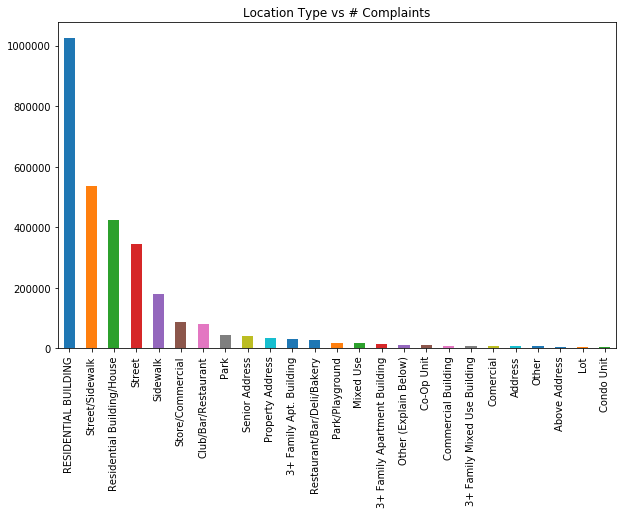

In [17]:
(df['Location Type'].value_counts()).head(25).plot(kind='bar',figsize=(10,6),title = 'Location Type vs # Complaints')

###### LOCATION TYPE: Remove Punctuations and convert them into lowe case 

In [7]:
df['Location Type'] = df['Location Type'].astype(str) 
df['Location Type'] = df['Location Type'].apply(to_lower)
df['Location Type'] = df['Location Type'].apply(remove_punctuation)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)


In [8]:
df['Location Type'].head()

0                      nan
1                      nan
2                      nan
3    3 family apt building
4                   street
Name: Location Type, dtype: object

In [20]:
location_type = df['Location Type'].value_counts().compute()
location_type = location_type.sort_values(ascending=True)
#Reversing array as maximum number of complaintS should appear first 
location_type[::-1]

residential building                  1026786
nan                                   854315 
streetsidewalk                        535318 
residential buildinghouse             423314 
street                                345447 
sidewalk                              178945 
storecommercial                       87196  
clubbarrestaurant                     79671  
park                                  44233  
senior address                        40704  
property address                      33539  
3 family apt building                 31077  
restaurantbardelibakery               26423  
parkplayground                        18853  
mixed use                             17854  
3 family apartment building           14992  
other explain below                   12425  
coop unit                             11002  
commercial building                   7883   
3 family mixed use building           7631   
comercial                             7517   
address                           

In [21]:
df[["Location","Location Type","Latitude","Longitude","Incident Address","Address Type"]].head(10)

,Location,Location Type,Latitude,Longitude,Incident Address,Address Type
0,"(40.75564086047822, -73.97510913260558)",nan,40.755641,-73.975109,270 PARK AVENUE,ADDRESS
1,"(40.72822500217204, -73.98315795150333)",nan,40.728225,-73.983158,278 EAST 10 STREET,ADDRESS
2,"(40.73586711990034, -73.98915316963569)",nan,40.735867,-73.989153,101 EAST 16 STREET,ADDRESS
3,"(40.769974489179866, -73.95118592429507)",3 family apt building,40.769974,-73.951186,500 EAST 77 STREET,ADDRESS
4,"(40.718097970057514, -74.0049638254782)",street,40.718098,-74.004964,91 FRANKLIN STREET,ADDRESS
5,"(40.73571101507024, -73.99384048701876)",street,40.735711,-73.993840,78 5 AVENUE,ADDRESS
6,"(40.70315194054949, -74.01443009679454)",nan,40.703152,-74.014430,17 STATE STREET,INTERSECTION
7,"(40.803953620795205, -73.95638046816835)",residential building,40.803954,-73.956380,314 WEST 115 STREET,ADDRESS
8,"(40.74340744589288, -73.9979754622382)",residential building,40.743407,-73.997975,249 WEST 21 STREET,ADDRESS
9,"(40.727626697028455, -73.9835152894863)",residential building,40.727627,-73.983515,435 EAST 9 STREET,ADDRESS


1. Locaion Type has >80000 null values which is bit bothering
2. First Can we predict Location Type?
3. If so How to to predict it/Check Acurracy?   --> Agency , Latitude, Longitude, Incizent Zip lets try ...
4. Incident Address Cannot identify the type of location at all

In [22]:
df["Address Type"].unique()

Dask Series Structure:
npartitions=1
    object
    ...   
Name: Address Type, dtype: object
Dask Name: unique-agg, 1546 tasks

#############################################################################################################
############################################################################################################
###############################################################################################################
##################################################################################################################
####################################################################################################################

## Converting DASK to Pandas Dataframe

In [9]:
df = df.compute()

In [10]:
df.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek
97203,27842644,2014-04-14 19:18:00,2014-04-18 21:30:00,DEP,Department of Environmental Protection,Noise,noise construction beforeafter hours nm,nan,10022,NaN,...,Unspecified,MANHATTAN,40.754876,-73.968522,"(40.754876209548584, -73.96852222092697)",4.0,4.0,2014,4,0
97204,27842645,2014-04-14 18:24:00,2014-04-18 20:15:00,DEP,Department of Environmental Protection,Noise,noise construction beforeafter hours nm,nan,10009,170 1 AVENUE,...,Unspecified,MANHATTAN,40.729013,-73.984244,"(40.729012900829474, -73.9842437670659)",4.0,4.0,2014,4,0
97205,27842648,2014-04-14 21:53:00,2014-04-18 20:30:00,DEP,Department of Environmental Protection,Noise,noise construction equipment nc,nan,10007,NaN,...,Unspecified,MANHATTAN,40.713256,-74.009256,"(40.71325594707911, -74.00925599630611)",3.0,3.0,2014,4,0
97206,27842649,2014-04-14 08:48:00,2014-04-21 16:45:00,DEP,Department of Environmental Protection,Noise,noise construction equipment nc,nan,10006,34 WEST STREET,...,Unspecified,MANHATTAN,40.706797,-74.016000,"(40.70679678045445, -74.01599985239896)",7.0,7.0,2014,4,0
97207,27842650,2014-04-14 23:02:00,2014-04-15 20:00:00,DEP,Department of Environmental Protection,Noise,noise jack hammering nc,nan,10036,NaN,...,Unspecified,MANHATTAN,40.756139,-73.983169,"(40.75613911897527, -73.98316894112523)",0.0,0.0,2014,4,0


##### Removing NULL values of Location Latitude and Longitude from my dataset as they constitude 4% of missing values

In [11]:
df= df[df['Longitude'].notnull()]
df= df[df['Latitude'].notnull()]
df= df[df['Location'].notnull()]

###### Analysisng our Target Variable with IVs

(-74.06067092158591, -73.81204192188937, 40.66894319658698, 40.893774044990124)

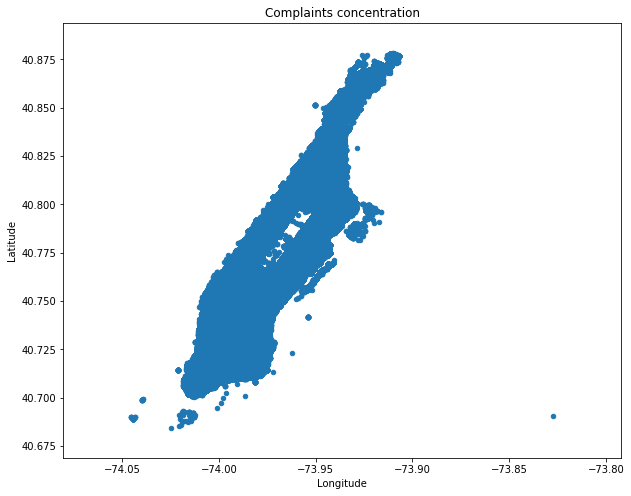

In [26]:
df.plot(kind='scatter',x='Longitude', y='Latitude', figsize=(10,8),title = 'Complaints concentration').axis('equal')

(-74.04536231335364, -73.82735053012165, 40.68430458518933, 40.87841265638778)

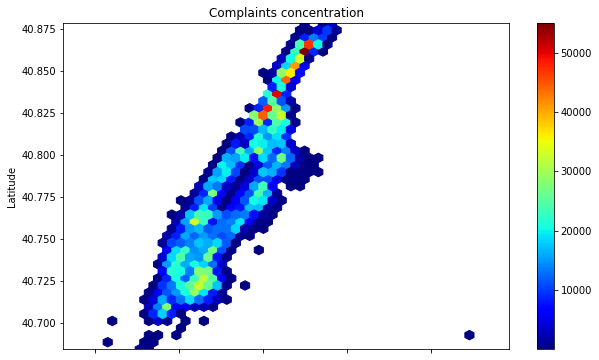

In [27]:
df.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,colormap = 'jet',mincnt=1,title = 'Complaints concentration', figsize=(10,6)).axis('equal')

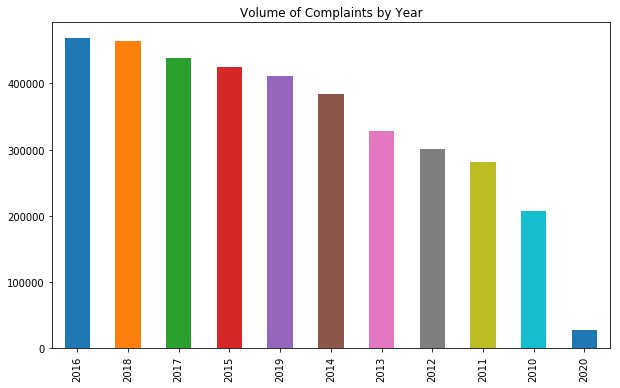

In [28]:
##### Complaints by Year 

df['Year'].value_counts().plot(kind = 'bar',figsize=(10,6), title = 'Volume of Complaints by Year')

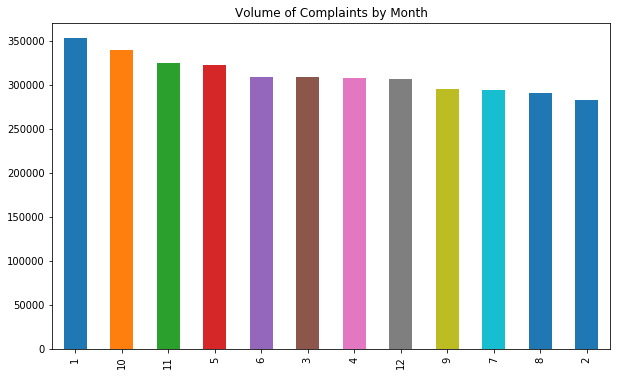

In [29]:
df['Month'].value_counts().plot(kind = 'bar',figsize=(10,6), title = 'Volume of Complaints by Month')

#### January,October-Novemeber and May are of most complaints

#############################################################################################################
#############################################################################################################

### Complaint Type : Target Variable Analysis and MeRGINGS

In [12]:
df['Complaint Type'] = df['Complaint Type'].apply(remove_punctuation)

df['Complaint Type'] = df['Complaint Type'].apply(to_lower)

In [13]:
df['Complaint Type'].value_counts()

noise  residential                     407748
heathot water                          281958
noise                                  227071
noise  streetsidewalk                  188464
street condition                       156465
noise  commercial                      141650
illegal parking                        141450
heating                                133222
plumbing                               116725
water system                           113250
taxi complaint                          99911
broken muni meter                       91869
unsanitary condition                    84823
homeless person assistance              75680
paintplaster                            70677
noise  vehicle                          66085
general constructionplumbing            62635
rodent                                  57021
general construction                    56591
dirty conditions                        48111
consumer complaint                      43008
electric                          

In [32]:
df[['Complaint Type','Descriptor']]

,Complaint Type,Descriptor
0,water system,hydrant knocked overmissing wc
1,water system,waterlow pressure wa
2,air quality,air smoke vehicular aa
3,rodent,rat sight
4,sanitation condition,street conddumpoutdropoff
5,sanitation condition,street conddumpoutdropoff
6,street light condition,street light
7,unsanitary condition,mold
8,appliance,refriger
9,plumbing,radiat


###### Heat Complaints

In [33]:
df[df['Complaint Type'].str.contains("cool") ][['Complaint Type',"Descriptor"]]

,Complaint Type,Descriptor
63569,cooling tower,brokendefect
64225,cooling tower,unsanitary condit
85947,cooling tower,brokendefect
2488,cooling tower,brokendefect
22472,cooling tower,brokendefect
13738,cooling tower,brokendefect
18712,cooling tower,brokendefect
85669,cooling tower,brokendefect
60579,cooling tower,unsanitary condit
22565,cooling tower,brokendefect


In [34]:
df[df['Complaint Type'].str.contains("heat") ]["Complaint Type"].unique()

array(['heathot water', 'nonresidential heat', 'heating'], dtype=object)

In [14]:
df['Complaint Type'] = df['Complaint Type'].replace(['heathot water', 'nonresidential heat','heating'], 'HeatComplaints')

##### Noise Complaints

In [36]:
df[df['Complaint Type'].str.contains("noise") ]["Complaint Type"].unique()

array(['noise', 'collection truck noise', 'noise  commercial',
       'noise  residential', 'noise  vehicle', 'noise  house of worship',
       'noise  streetsidewalk', 'noise  park', 'noise  helicopter',
       'noise survey'], dtype=object)

##### Whats a Noise Survey Means?

In [37]:
df[df['Complaint Type'].str.contains("noise survey") ][['Complaint Type',"Descriptor","Resolution Description","Agency"]].head()

,Complaint Type,Descriptor,Resolution Description,Agency
78506,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1
80146,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1
80163,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1
80164,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1
80166,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1


###### Its noise created by people and they 3-1-1 to complain. 311 is non emergency phone number

In [15]:
df['Complaint Type'] = df['Complaint Type'].replace(['noise', 'collection truck noise', 'noise  commercial',
       'noise  residential', 'noise  vehicle', 'noise  house of worship',
       'noise  streetsidewalk', 'noise  park', 'noise  helicopter',
       'noise survey'], 'NoiseComplaints')

##### Construction/Plumbing Complaints

In [39]:
df[df['Complaint Type'].str.contains("construction|plumbing") ]["Complaint Type"].unique()

array(['plumbing', 'general constructionplumbing',
       'construction safety enforcement', 'construction lead dust',
       'general construction', 'construction'], dtype=object)

In [16]:
df['Complaint Type'] = df['Complaint Type'].replace(['general constructionplumbing', 'construction safety enforcement',
       'construction lead dust', 'general construction', 'construction','plumbing'],'Construction/PlumbingComplaints')

###### Parking Complaints

In [41]:
df[df['Complaint Type'].str.contains("parking|blocked driveway|park") ]["Complaint Type"].unique()

array(['violation of park rules', 'blocked driveway', 'illegal parking',
       'municipal parking facility', 'animal in a park',
       'broken parking meter', 'trafficillegal parking',
       'dof parking  payment issue'], dtype=object)

In [42]:
df[df['Complaint Type'].str.contains("dof parking  payment issue") ][['Complaint Type',"Descriptor","Resolution Description","Agency"]].head()

,Complaint Type,Descriptor,Resolution Description,Agency
100609,dof parking payment issue,person reflect,see not,DOF


##### Note dof parking payment: comes under dof issues because you will know what type of complaint in descriptor

In [17]:
# Note dof parking payment comes under dof issues because you will know what type of complaint in descriptor

df['Complaint Type'] = df['Complaint Type'].replace(['illegal parking', 'municipal parking facility',
       'broken parking meter', 'trafficillegal parking','violation of park rules','blocked driveway'],'ParkingComplaints')

##### DOF issues (Department of Fiance)

In [44]:
df[df['Complaint Type'].str.contains("dof") ]["Complaint Type"].unique()

array(['dof property  payment issue', 'dof parking  payment issue',
       'dof property  reduction issue'], dtype=object)

In [18]:
df['Complaint Type'] = df['Complaint Type'].replace(['dof property  payment issue', 'dof property  owner issue',
       'dof property  request copy', 'dof property  reduction issue',
       'dof property  city rebate', 'dof parking  payment issue',
       'dof property  property value', 'dof property  rpie issue',
       'dof property  state rebate', 'dof parking  tax exemption',
       'dof property  update account'],'DOFComplaints')

###### Paint Plaster Issues

In [46]:
df[df['Complaint Type'].str.contains("paint") ]["Complaint Type"].unique()

array(['paintplaster', 'paint  plaster'], dtype=object)

In [19]:
df['Complaint Type'] = df['Complaint Type'].replace(['paintplaster', 'paint  plaster'],'Paint/PlasterComplaints')

##### Water Complaints

In [48]:
df[df['Complaint Type'].str.contains("water") ]["Complaint Type"].unique()

array(['water system', 'water leak', 'standing water',
       'water conservation', 'water quality', 'drinking water',
       'bottled water'], dtype=object)

In [20]:
df['Complaint Type'] = df['Complaint Type'].replace(['water system', 'water leak', 'standing water',
       'water conservation', 'water quality', 'drinking water',
       'bottled water'],'WaterComplaints')

##### SanitaryCompalints

In [50]:
df[df['Complaint Type'].str.contains("dirt|sanitation condition") ]["Complaint Type"].unique()

array(['sanitation condition', 'dirty conditions'], dtype=object)

In [21]:
df['Complaint Type'] = df['Complaint Type'].replace(['unsanitary pigeon condition',
    'unsanitary condition','dirty conditions','unsanitary animal pvt property','sanitation condition'],'SanitationComplaints')

###### Highway Complaints

In [52]:
df[df['Complaint Type'].str.contains("highway") ]["Complaint Type"].unique()

array(['highway condition', 'highway sign  missing',
       'highway sign  dangling', 'highway sign  damaged'], dtype=object)

In [22]:
df['Complaint Type'] = df['Complaint Type'].replace(['highway condition', 'highway sign  missing',
       'highway sign  dangling', 'highway sign  damaged'],'HighwayComplaints')

###### Street/Vehicle/TreeCompalints

In [54]:
df[df['Complaint Type'].str.contains("tree|sidewalk|vehicle") ]["Complaint Type"].unique()

array(['street light condition', 'street condition', 'derelict vehicles',
       'street sign  damaged', 'sidewalk condition', 'dead tree',
       'street sign  dangling', 'street sign  missing',
       'for hire vehicle complaint', 'damaged tree', 'new tree request',
       'illegal tree damage', 'rootsewersidewalk condition',
       'derelict vehicle', 'overgrown treebranches',
       'for hire vehicle report', 'request xmas tree collection',
       'deaddying tree', 'abandoned vehicle', 'dep sidewalk condition',
       'homeless street condition', 'city vehicle placard complaint'],
      dtype=object)

###### Checking ("request xmas tree collection","homeless street condition")

In [55]:
pd.set_option('display.max_colwidth', -1)
df[df['Complaint Type'].str.contains("request xmas tree collection","homeless street condition") ][["Descriptor","Resolution Description"]].head()
####during christmas people order xmas trees and keep it on side walk issues

,Descriptor,Resolution Description
97762,c request xmas trees collect,department sanitation investigated complaint found condition loc
11789,c request xmas trees collect,department sanitation collected requested item
11822,c request xmas trees collect,department sanitation removed item
11824,c request xmas trees collect,department sanitation collected requested item
11825,c request xmas trees collect,department sanitation investigated complaint found condition loc


In [56]:
pd.set_option('display.max_colwidth', -1)
df[df['Complaint Type'].str.contains("homeless street condition") ][["Descriptor","Resolution Description"]].head()
####during christmas people order xmas trees and keep it on side walk issues

,Descriptor,Resolution Description
57445,nan,police department responded complaint information available observed evid
57985,nan,police department responded complaint took action fix condit
58436,nan,police department responded complaint took action fix condit
63180,nan,police department responded complaint determined police action necessari
63181,nan,police department responded complaint information available observed evid


In [57]:
#graffiti
pd.set_option('display.max_colwidth', 1)

df[df['Complaint Type'].str.contains("graffiti") ][["Descriptor","Resolution Description"]].head()

,Descriptor,Resolution Description
61,graffiti,city removed graffiti properti
136,graffiti,city removed graffiti properti
214,graffiti,cleaning crew dispatched owner refused graffiti remov
416,graffiti,city removed graffiti properti
452,graffiti,city removed graffiti properti


##### I am removing homeless street condition as it comes under HomelessComplaints

In [23]:
df['Complaint Type'] = df['Complaint Type'].replace(['street light condition', 'street condition',
       'street sign  damaged', 'sidewalk condition', 'dead tree',
       'street sign  dangling', 'street sign  missing', 'damaged tree',
       'new tree request', 'illegal tree damage',
       'rootsewersidewalk condition', 'overgrown treebranches',
       'request xmas tree collection', 'deaddying tree',
       'dep sidewalk condition','graffiti','derelict vehicles',
       'for hire vehicle complaint', 'derelict vehicle',
       'for hire vehicle report', 'abandoned vehicle',
       'city vehicle placard complaint'],'StreetComplaints')

##### Sewer Complaints,Traffic,Homeless

In [59]:
df[df['Complaint Type'].str.contains("sewer|sewage") ]["Complaint Type"].unique()


array(['sewer', 'indoor sewage'], dtype=object)

In [24]:
df['Complaint Type'] = df['Complaint Type'].replace(['sewer','indoor sewage'],'SewerComplaints')

##### Homeless Complaints

In [61]:
df[df['Complaint Type'].str.contains("homeless") ]["Complaint Type"].unique()

array(['homeless encampment', 'homeless person assistance',
       'homeless street condition'], dtype=object)

In [25]:
df['Complaint Type'] = df['Complaint Type'].replace(['homeless street condition',
                                                     'homeless encampment', 'homeless person assistance'],'HomelessComplaints')

In [63]:
df[df['Complaint Type'].str.contains("traffic|signal") ]["Complaint Type"].unique()

array(['traffic signal condition', 'traffic'], dtype=object)

In [26]:
df['Complaint Type'] = df['Complaint Type'].replace(['traffic signal condition', 'traffic'],'TrafficComplaints')

##### Taxi Complaints

In [65]:
df[df['Complaint Type'].str.contains("taxi") ]["Complaint Type"].unique()

array(['taxi complaint', 'taxi report', 'taxi compliment',
       'green taxi report', 'dispatched taxi complaint'], dtype=object)

In [27]:
df['Complaint Type'] = df['Complaint Type'].replace(['taxi complaint', 'taxi report', 'taxi compliment',
       'green taxi report', 'dispatched taxi complaint'],'TaxiComplaints')

###### Building Complaints

In [28]:
df[df['Complaint Type'].str.contains("building|floor|window|apt|apartment") ]["Complaint Type"].unique()

array(['doorwindow', 'flooringstairs', 'buildinguse', 'outside building',
       'vacant apartment', 'building marshals office',
       'building condition'], dtype=object)

###### Checking the Building Complaints in detail

In [68]:
df[df['Complaint Type'].str.contains("building|floor|window|apt|apartment") ][["Complaint Type","Descriptor","Resolution Description"]]

,Complaint Type,Descriptor,Resolution Description
23,doorwindow,door,department housing preservation development inspected following conditions violations issued information specific violations available wwwnycgovhpd
24,doorwindow,window fram,department housing preservation development inspected following conditions violations issued complaint clos
25,doorwindow,window fram,department housing preservation development inspected following conditions violations issued complaint clos
26,flooringstairs,floor,department housing preservation development able gain access inspect following conditions complaint closed condition still exists please file new complaint
29,flooringstairs,floor,department housing preservation development able gain access inspect following conditions complaint closed condition still exists please file new complaint
99,doorwindow,door,department housing preservation development inspected following conditions violations issued information specific violations available wwwnycgovhpd
101,doorwindow,door fram,department housing preservation development inspected following conditions violations issued information specific violations available wwwnycgovhpd
103,doorwindow,door,department housing preservation development inspected following conditions violations issued complaint clos
105,doorwindow,door,department housing preservation development inspected following conditions violations issued complaint clos
109,flooringstairs,floor,department housing preservation development inspected following conditions violations issued information specific violations available wwwnycgovhpd


In [29]:
df['Complaint Type'] = df['Complaint Type'].replace(['doorwindow', 'flooringstairs', 'buildinguse', 'outside building',
       'vacant apartment', 'building marshals office',
       'building condition','elevator'],'BuildingComplaints')

##### Rodent

In [70]:
df[df['Complaint Type'].str.contains("rodent|cockroach|pest") ][["Descriptor","Resolution Description"]].head()

,Descriptor,Resolution Description
3,rat sight,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu
22,condition attracting rod,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu
63,mouse sight,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu
73,signs rod,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu
83,rat sight,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu


In [71]:
df[df['Complaint Type'].str.contains("broken muni meter") ][["Descriptor","Resolution Description"]].head()

,Descriptor,Resolution Description
171,receipt,department transportation completed request corrected condit
422,coin card regist,department transportation inspected condition reported find additional information notes customer field
1913,coin card regist,department transportation inspected condition reported find additional information notes customer field
3164,timer defect fastfail,department transportation inspected condition reported find additional information notes customer field
4067,receipt,department transportation inspected condition reported find additional information notes customer field


In [72]:
df[df['Complaint Type'].str.contains("request large bulky item collection") ][["Descriptor","Resolution Description"]].head()

,Descriptor,Resolution Description
42343,request large bulky item collect,nan
42576,request large bulky item collect,nan
42596,request large bulky item collect,nan
42947,request large bulky item collect,nan
43018,request large bulky item collect,nan


In [73]:
df['Complaint Type'].value_counts()

NoiseComplaints                          1051455
HeatComplaints                           415212 
StreetComplaints                         331310 
Construction/PlumbingComplaints          242722 
ParkingComplaints                        185658 
SanitationComplaints                     163330 
WaterComplaints                          159555 
BuildingComplaints                       120266 
Paint/PlasterComplaints                  112715 
TaxiComplaints                           107669 
HomelessComplaints                       98431  
broken muni meter                        91869  
rodent                                   57021  
consumer complaint                       43008  
electric                                 42232  
general                                  41651  
SewerComplaints                          33230  
request large bulky item collection      32784  
air quality                              31139  
nonconst                                 28893  
TrafficComplaints   

In [30]:
df.loc[~df["Complaint Type"].isin(['NoiseComplaints',
'HeatComplaints',                           
'StreetComplaints',                         
'Construction/PlumbingComplaints',                    
'SanitationComplaints',                     
'WaterComplaints',                         
'BuildingComplaints',                       
'Paint/PlasterComplaints',                   
'TaxiComplaints',                           
'HomelessComplaints',
'DOFComplaints',
'HighwayComplaints',
'ParkingComplaints',
'broken muni meter',                        
'rodent',                                   
'consumer complaint',                      
'electric',                                  
'general',                                 
'SewerComplaints',                          
'request large bulky item collection',      
'air quality',                                
'nonconst',                                 
'TrafficComplaints',                         
'vending',                                   
'food establishment',                       
'missed collection all materials' ]), "Complaint Type"] = "Other Complaints"

In [31]:
df['Complaint Type'].value_counts()

NoiseComplaints                        1051455
HeatComplaints                          415212
StreetComplaints                        331310
Other Complaints                        249631
Construction/PlumbingComplaints         242722
ParkingComplaints                       185658
SanitationComplaints                    163330
WaterComplaints                         159555
BuildingComplaints                      120266
Paint/PlasterComplaints                 112715
TaxiComplaints                          107669
HomelessComplaints                       98431
broken muni meter                        91869
rodent                                   57021
consumer complaint                       43008
electric                                 42232
general                                  41651
SewerComplaints                          33230
request large bulky item collection      32784
air quality                              31139
nonconst                                 28893
TrafficCompla

In [76]:
df[df['Complaint Type'].str.contains("vending|food establishment") ][["Complaint Type","Descriptor","Resolution Description"]].head()

,Complaint Type,Descriptor,Resolution Description
8568,vending,prohibited area,police department responded complaint information available observed evidence violation tim
10660,food establishment,rodentsinsectsgarbag,department health mental hygiene sent official written notification ownerlandlord warning potential violations instructing correct situation situation persists days initial complaint please make new complaint
15140,vending,unlicens,police department responded upon arrival responsible condition gon
23185,food establishment,odor,department health mental hygiene sent official written notification ownerlandlord warning potential violations instructing correct situation situation persists days initial complaint please make new complaint
26743,vending,prohibited area,police department issued summons response complaint


In [32]:
df['Complaint Type'] = df['Complaint Type'].replace(['vending'],'StreetComplaints')

##### Vending Complaints comes uder Street Complaints

In [33]:
df['Complaint Type'].value_counts()

NoiseComplaints                        1051455
HeatComplaints                          415212
StreetComplaints                        355868
Other Complaints                        249631
Construction/PlumbingComplaints         242722
ParkingComplaints                       185658
SanitationComplaints                    163330
WaterComplaints                         159555
BuildingComplaints                      120266
Paint/PlasterComplaints                 112715
TaxiComplaints                          107669
HomelessComplaints                       98431
broken muni meter                        91869
rodent                                   57021
consumer complaint                       43008
electric                                 42232
general                                  41651
SewerComplaints                          33230
request large bulky item collection      32784
air quality                              31139
nonconst                                 28893
TrafficCompla

##### Revisiting Location Type (Only doing it for highest amount of variables)

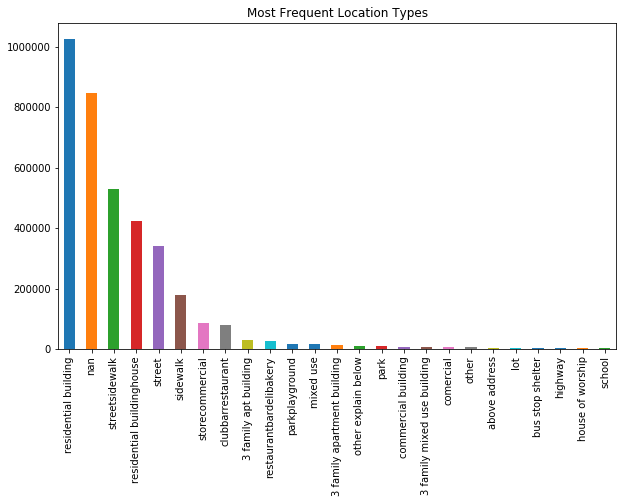

In [79]:
(df['Location Type'].value_counts()).head(25).plot(kind='bar',
                    figsize=(10,6), title = 'Most Frequent Location Types')

In [80]:
df['Location Type'].unique()

array(['nan', '3 family apt building', 'street', 'residential building',
       'sidewalk', 'lot', '12 family dwelling', 'comercial',
       'commercial building', 'abandoned building', 'mixed use',
       '3 family mixed use building', 'other explain below',
       '3 family apartment building', 'schoolpreschool', 'residential',
       'streetcurbside', 'construction site', 'other',
       'clubbarrestaurant', 'residential buildinghouse', 'vacant lot',
       'vacant building', 'public gardenpark',
       'single room occupancy sro', 'streetsidewalk', 'catch basinsewer',
       'storecommercial', 'park', 'public stairs', 'highway',
       '12 family mixed use building', 'school', 'house of worship',
       'public garden', 'restaurantbardelibakery', 'senior center',
       'government building', 'overpass', 'parking lotgarage', 'taxi',
       'parkplayground', 'office building', 'recreation center',
       'day carenursery', 'bus stop shelter', 'curb', 'hospital',
       'house and st

In [81]:
df[df['Location Type'].str.contains("residential") ]["Location Type"].unique()

array(['residential building', 'residential', 'residential buildinghouse',
       'residential property', 'building nonresidential'], dtype=object)

In [34]:
df['Location Type'] = df['Location Type'].replace(['residential building', 'residential', 'residential buildinghouse',
       'residential property'],'RESIDENTIAL')

In [83]:
df[df['Location Type'].str.contains("school") ]["Location Type"].unique()

array(['schoolpreschool', 'school', 'cafeteria  private school',
       'cafeteria  public school', 'private school', 'public school',
       'school safety zone'], dtype=object)

In [35]:
df['Location Type'] = df['Location Type'].replace(['schoolpreschool', 'school', 'cafeteria  private school',
       'cafeteria  public school', 'private school', 'public school',
       'school safety zone'],'SCHOOL')

In [85]:
df[df['Location Type'].str.contains("apartment") ]["Location Type"].unique()

array(['3 family apartment building', 'apartment', 'apartment building'],
      dtype=object)

In [36]:
df['Location Type'] = df['Location Type'].replace(['3 family apartment building', 'apartment', 'apartment building'],'SCHOOL')

In [87]:
df[df['Location Type'].str.contains("comercial|commercial") ]["Location Type"].unique()

array(['comercial', 'commercial building', 'storecommercial',
       'commercial', 'commercial property'], dtype=object)

In [37]:
df['Location Type'] = df['Location Type'].replace(['comercial', 'commercial building', 'storecommercial',
       'commercial', 'commercial property'],'COMMERCIAL')

In [89]:
df[df['Location Type'].str.contains("play|park") ]["Location Type"].unique()

array(['public gardenpark', 'park', 'parking lotgarage', 'parkplayground',
       'parking lot', 'public parkgarden'], dtype=object)

##### Remove parking lotgrarage

In [38]:
df['Location Type'] = df['Location Type'].replace(['public gardenpark', 'park', 'parkplayground', 'public parkgarden'],'PARK')

In [91]:
df[df['Location Type'].str.contains("restaurant") ]["Location Type"].unique()

array(['clubbarrestaurant', 'restaurantbardelibakery', 'restaurant',
       'barrestaurant'], dtype=object)

In [39]:
df['Location Type'] = df['Location Type'].replace(['clubbarrestaurant', 'restaurantbardelibakery', 'restaurant',
       'barrestaurant'],'RESTAURANT')

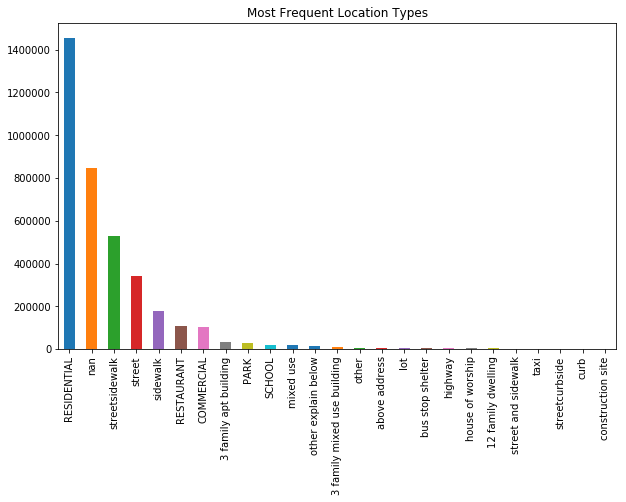

In [93]:
(df['Location Type'].value_counts()).head(25).plot(kind='bar',
                    figsize=(10,6), title = 'Most Frequent Location Types')

## Status Variable

In [94]:
df['Status'].unique()

array(['Closed', 'Pending', 'Assigned', 'Open', 'Started', 'Unassigned',
       'In Progress'], dtype=object)

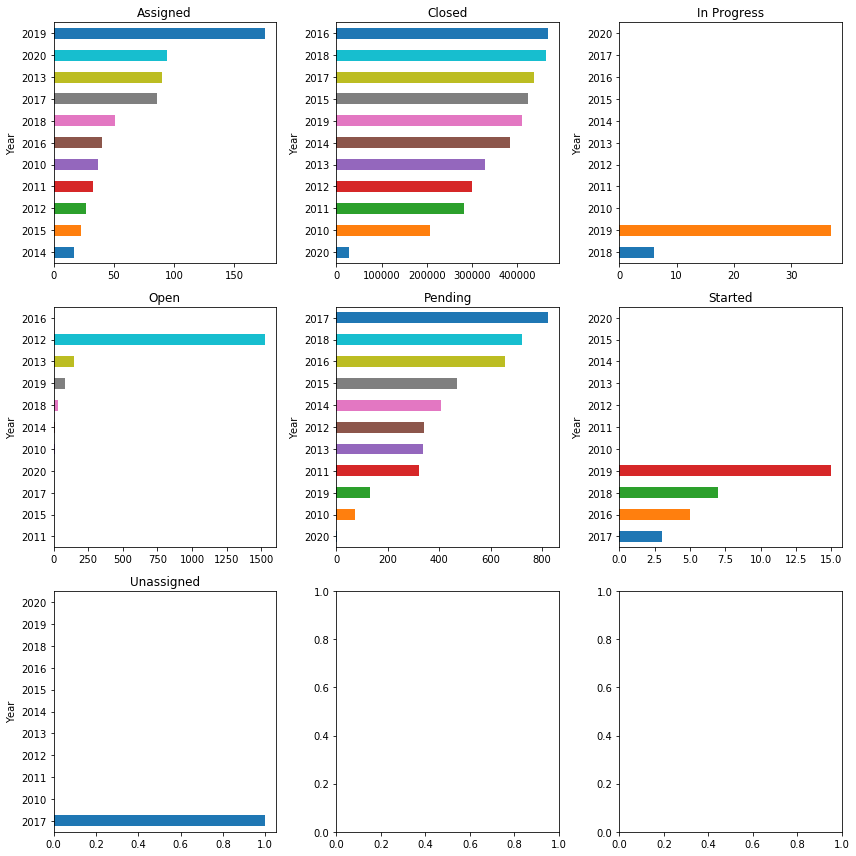

In [95]:
borough_comp = df.groupby(['Year','Status']).size().unstack()

col_number = 3
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

In [96]:
df[df['Status']!='Closed'][["Complaint Type","Status","Descriptor","Year","Resolution Description"]]

,Complaint Type,Status,Descriptor,Year,Resolution Description
161,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
1512,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
1814,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
2237,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
5522,missed collection all materials,Pending,missed collect,2014,department sanitation investigated found complaint jurisdiction department sanitation reviewed found meeting criteria compliant service request
5931,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
6039,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
6064,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
6065,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
6075,missed collection all materials,Pending,rg missed recycling pap,2014,department sanitation investigated found complaint jurisdiction department sanitation reviewed found meeting criteria compliant service request


#### Derelict Vehicle means Abondend Vehicle they cant stay for years on streets some one will report or authorities with take a look so the incidents below certain year can be removed as they forgot to close the request
It can be observed that

1. There are many direlict vehicle complaints reported few years ago and "Department of Sanitation has removed vehicles" but the incidents were not closed

##### I have to remove above rows as they are outliers and are supposed to be closed

In [97]:
df[(df['Status']!='Closed' ) & (df['Descriptor'].str.contains("derelict vehicl") ) & (df['Resolution Description'].str.contains("removed") )]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek
161,27844542,2014-04-14 16:37:00,2014-04-14 16:37:00,DSNY,Manhattan 05,StreetComplaints,derelict vehicl,street,10011,27 WEST 20 STREET,...,Unspecified,MANHATTAN,40.740135,-73.992021,"(40.740135444246874, -73.99202133124348)",0.0,0.0,2014,4,0
1512,27859744,2014-04-16 17:29:00,2014-04-16 17:29:00,DSNY,BCC - Manhattan,StreetComplaints,derelict vehicl,street,10040,NaN,...,Unspecified,MANHATTAN,40.853686,-73.930538,"(40.85368615752927, -73.93053828207398)",0.0,0.0,2014,4,2
1814,27862649,2014-04-17 01:29:00,2014-04-17 12:00:00,DSNY,BCC - Manhattan,StreetComplaints,derelict vehicl,street,10030,268 WEST 134 STREET,...,Unspecified,MANHATTAN,40.815397,-73.946030,"(40.81539748009863, -73.946029790319)",0.0,0.0,2014,4,3
2237,27867345,2014-04-17 01:33:00,2014-04-17 12:00:00,DSNY,BCC - Manhattan,StreetComplaints,derelict vehicl,street,10030,268 WEST 134 STREET,...,Unspecified,MANHATTAN,40.815397,-73.946030,"(40.81539748009863, -73.946029790319)",0.0,0.0,2014,4,3
5931,27916189,2014-04-25 08:57:00,2014-04-25 12:00:00,DSNY,BCC - Manhattan,StreetComplaints,derelict vehicl,street,10032,788 RIVERSIDE DRIVE,...,Unspecified,MANHATTAN,40.834397,-73.947821,"(40.83439723109371, -73.94782124678471)",0.0,0.0,2014,4,4
6039,27916915,2014-04-25 09:54:00,2014-04-25 12:00:00,DSNY,Manhattan 04,StreetComplaints,derelict vehicl,street,10011,412 WEST 19 STREET,...,Unspecified,MANHATTAN,40.744223,-74.003587,"(40.744222598603464, -74.00358719279463)",0.0,0.0,2014,4,4
6064,27912778,2014-04-25 10:35:00,2014-04-25 12:00:00,DSNY,Manhattan 04,StreetComplaints,derelict vehicl,street,10018,NaN,...,Unspecified,MANHATTAN,40.755869,-73.998210,"(40.7558686048635, -73.99820969949639)",0.0,0.0,2014,4,4
6065,27912781,2014-04-25 09:29:00,2014-04-25 12:00:00,DSNY,Manhattan 04,StreetComplaints,derelict vehicl,street,10011,412 WEST 19 STREET,...,Unspecified,MANHATTAN,40.744223,-74.003587,"(40.744222598603464, -74.00358719279463)",0.0,0.0,2014,4,4
6132,27913614,2014-04-25 16:35:00,2014-04-25 16:35:00,DSNY,BCC - Manhattan,StreetComplaints,derelict vehicl,street,10039,NaN,...,Unspecified,MANHATTAN,40.829738,-73.938639,"(40.82973767791686, -73.93863942249138)",0.0,0.0,2014,4,4
11282,27973937,2014-05-04 12:54:00,2014-05-04 12:54:00,DSNY,BCC - Manhattan,StreetComplaints,derelict vehicl,street,10026,295 WEST 110 STREET,...,Unspecified,MANHATTAN,40.800334,-73.957412,"(40.800333712543846, -73.95741222838548)",0.0,0.0,2014,5,6


##### I am changing the status of those incidents that has to be closed 

In [40]:
df.loc[((df['Status']!='Closed' ) 
       & (df['Descriptor'].str.contains("derelict vehicl") ) 
       & (df['Resolution Description'].str.contains("removed"))) , "Status"] = "Closed"

    

In [99]:
#df.drop(df[(df['Status']!='Closed' ) & (df['Descriptor'].str.contains("derelict vehicl") ) & (df['Resolution Description'].str.contains("removed") )].index,inplace = True)

In [41]:
df[(df['Status']!='Closed' ) & (df['Descriptor'].str.contains("derelict vehicl") ) & (df['Resolution Description'].str.contains("removed") )]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek


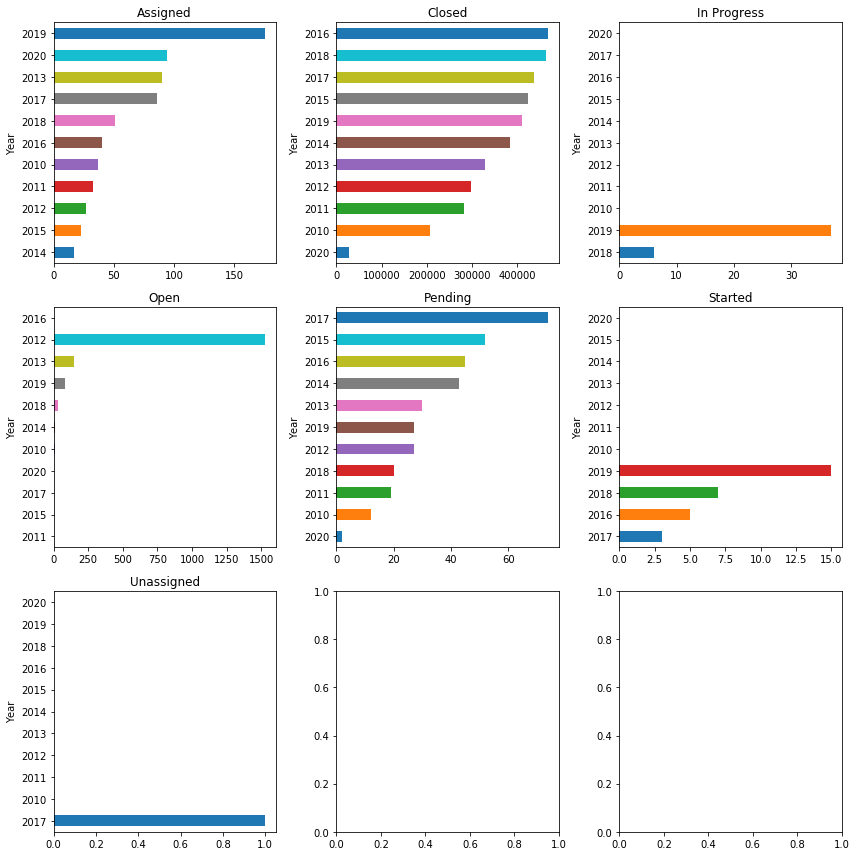

In [101]:
borough_comp = df.groupby(['Year','Status']).size().unstack()

col_number = 3
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

In [42]:
df.shape

(3738029, 34)

In [43]:
df = df[df['Location Type'] != 'nan']

###########################################################################################################################
#################################################################################################################################################

## MULTI CLASS CLASSIFICATION  

----> Example : A fruit is ORANGE ,APPLE OR PEAR but not both or all three

1. As it is a classification task with more than 2 classes and "IMBALANCED DATASET" 
2. (Classification classess are not of same quanitiy)
3. I want to use LOGISTIC REGRESSION / KERAS/ CSR MATRIX CROSS VALIDATION
 

In [85]:
df_model = df[["Agency","Descriptor","Complaint Type","Location Type","City","Status","Resolution Description","Latitude","Longitude","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]

In [86]:
df_model.dropna(how='any')

,Agency,Descriptor,Complaint Type,Location Type,City,Status,Resolution Description,Latitude,Longitude,Total_Time,Resolution_Time,Year,Month,DayofWeek
3,DOHMH,rat sight,rodent,3 family apt building,New York,Closed,department health mental hygiene review compla...,40.769974,-73.951186,8.0,8.0,2014,4,0
4,DSNY,street conddumpoutdropoff,SanitationComplaints,street,New York,Closed,department sanitation investigated complaint f...,40.718098,-74.004964,0.0,0.0,2014,4,0
5,DSNY,street conddumpoutdropoff,SanitationComplaints,street,New York,Closed,department sanitation investigated complaint f...,40.735711,-73.993840,0.0,0.0,2014,4,0
7,HPD,mold,SanitationComplaints,RESIDENTIAL,New York,Closed,department housing preservation development ab...,40.803954,-73.956380,9.0,9.0,2014,4,0
8,HPD,refriger,Other Complaints,RESIDENTIAL,New York,Closed,department housing preservation development ab...,40.743407,-73.997975,17.0,17.0,2014,4,0
9,HPD,radiat,Construction/PlumbingComplaints,RESIDENTIAL,New York,Closed,department housing preservation development in...,40.727627,-73.983515,4.0,4.0,2014,4,0
10,HPD,light,electric,RESIDENTIAL,New York,Closed,department housing preservation development in...,40.809791,-73.942353,13.0,13.0,2014,4,0
11,HPD,water suppli,Construction/PlumbingComplaints,RESIDENTIAL,New York,Closed,department housing preservation development in...,40.866432,-73.921526,10.0,10.0,2014,4,0
12,HPD,garbagerecycling storag,SanitationComplaints,RESIDENTIAL,New York,Closed,department housing preservation development in...,40.831117,-73.947896,15.0,15.0,2014,4,0
13,HPD,mold,SanitationComplaints,RESIDENTIAL,New York,Closed,department housing preservation development in...,40.753964,-73.997704,6.0,6.0,2014,4,0


In [87]:
df_model.shape

(2889298, 14)

## Label Powerset

In [65]:
df_model.dtypes

Agency                     object
Descriptor                 object
Complaint Type             object
Location Type              object
City                       object
Status                     object
Resolution Description     object
Latitude                  float64
Longitude                 float64
Total_Time                float64
Resolution_Time           float64
Year                        int64
Month                       int64
DayofWeek                   int64
dtype: object

In [66]:
df_model_label = df_model.copy()

In [67]:
label_encoder = LabelEncoder()
df_model_label['Agency']=label_encoder.fit_transform(df_model['Agency'])
df_model_label['Descriptor']=label_encoder.fit_transform(df_model['Descriptor'])
df_model_label['City']=label_encoder.fit_transform(df_model['City'])
df_model_label['Status']=label_encoder.fit_transform(df_model['Status'])
df_model_label['Resolution Description']=label_encoder.fit_transform(df_model['Resolution Description'])
df_model_label['Complaint Type']=label_encoder.fit_transform(df_model['Complaint Type'])
df_model_label['Location Type']=label_encoder.fit_transform(df_model['Location Type'])

In [68]:
df_model_label.head()

,Agency,Descriptor,Complaint Type,Location Type,City,Status,Resolution Description,Latitude,Longitude,Total_Time,Resolution_Time,Year,Month,DayofWeek
3,7,437,24,4,7,1,218,40.769974,-73.951186,8.0,8.0,2014,4,0
4,11,12,10,96,7,1,352,40.718098,-74.004964,0.0,0.0,2014,4,0
5,11,12,10,96,7,1,352,40.735711,-73.993840,0.0,0.0,2014,4,0
7,13,360,10,8,7,1,265,40.803954,-73.956380,9.0,9.0,2014,4,0
8,13,440,7,8,7,1,265,40.743407,-73.997975,17.0,17.0,2014,4,0


## Feature Engineering

1. Correlation is from 0 to 1 where 0 indicates least correlation and 1 indicates highest

### Correlation

,Agency,Descriptor,Complaint Type,Location Type,City,Status,Resolution Description,Latitude,Longitude,Total_Time,Resolution_Time,Year,Month,DayofWeek
Agency,1.000000,-0.080173,-0.332053,-0.177384,0.004395,0.002985,0.316354,0.178746,0.185890,-0.039490,-0.045917,0.013877,0.003653,0.089980
Descriptor,-0.080173,1.000000,0.106809,-0.081421,-0.001396,0.004814,0.012746,0.014862,0.010593,0.013915,0.015942,-0.061858,0.013674,0.008104
Complaint Type,-0.332053,0.106809,1.000000,0.290757,-0.003214,0.000021,-0.100357,-0.178258,-0.175208,0.070772,0.083340,-0.030051,0.007350,-0.059879
Location Type,-0.177384,-0.081421,0.290757,1.000000,-0.003293,-0.008143,0.259439,-0.246113,-0.256681,0.022838,0.027738,0.008040,0.020388,-0.004002
City,0.004395,-0.001396,-0.003214,-0.003293,1.000000,0.000268,-0.000333,-0.012787,-0.013573,0.000832,0.000993,0.005028,0.002126,-0.000115
Status,0.002985,0.004814,0.000021,-0.008143,0.000268,1.000000,-0.005365,0.007459,0.007141,0.001819,-0.003931,-0.021677,-0.000911,-0.002328
Resolution Description,0.316354,0.012746,-0.100357,0.259439,-0.000333,-0.005365,1.000000,-0.065085,-0.061553,-0.092719,-0.111080,0.057377,0.025214,0.160475
Latitude,0.178746,0.014862,-0.178258,-0.246113,-0.012787,0.007459,-0.065085,1.000000,0.914678,-0.022347,-0.026830,0.017864,-0.005914,0.015777
Longitude,0.185890,0.010593,-0.175208,-0.256681,-0.013573,0.007141,-0.061553,0.914678,1.000000,-0.021464,-0.025760,0.017410,-0.008409,0.015794
Total_Time,-0.039490,0.013915,0.070772,0.022838,0.000832,0.001819,-0.092719,-0.022347,-0.021464,1.000000,0.833756,-0.040323,0.002823,-0.028886


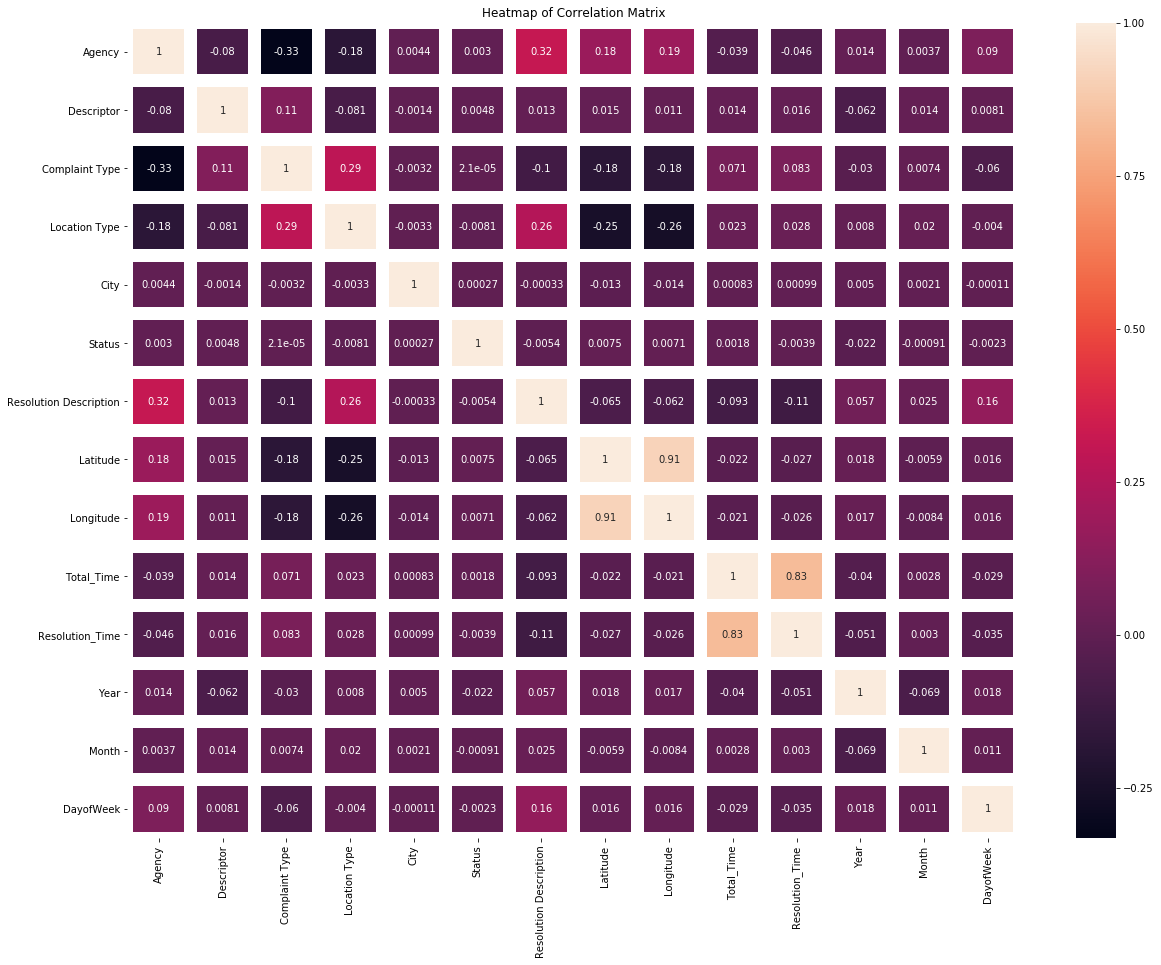

In [69]:
corr = df_model_label.corr()
fig, ax = plt.subplots(figsize=(20,15))    
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidths=12, 
            ax=ax,
            annot=True, 
            annot_kws={"size": 10})
plt.title('Heatmap of Correlation Matrix')
corr

In [70]:
X = df_model_label[["Agency","Descriptor","Location Type","City","Status","Resolution Description","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]
y = df_model_label["Complaint Type"]

1. Complaint Type is correlated to Location Type
2. Resolution Description and Agency are correlated

X = df_model[["Agency","Descriptor","Location","City","Status","Resolution Description","Latitude","Longitude","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]
y = df_model["Complaint Type"]

train_img, test_img, train_lbl, test_lbl = train_test_split(X, y, test_size=1/7.0, random_state=122)

### Feature Importance and Selection

### Univariate Selection

In [71]:
# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#For classification: chi2, f_classif, mutual_info_classif
# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 5 best features

                     Specs         Score
5   Resolution Description  1.919527e+08
2            Location Type  6.923855e+07
7          Resolution_Time  5.325097e+07
6               Total_Time  5.244690e+07
1               Descriptor  3.560353e+07
0                   Agency  9.734136e+05
10               DayofWeek  2.112259e+05
9                    Month  1.361257e+04
8                     Year  1.119331e+03
4                   Status  2.610277e+01


1. SKLearn selects best features suitable to our target variable
2. Its a chi2 test for non negative features

### Feature Importance

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Descriptor                0.416377
Resolution Description    0.156645
Agency                    0.154668
Location Type             0.095218
Total_Time                0.059818
Resolution_Time           0.057439
Year                      0.036139
Month                     0.013271
DayofWeek                 0.010324
Status                    0.000080
City                      0.000021
dtype: float64

No handles with labels found to put in legend.


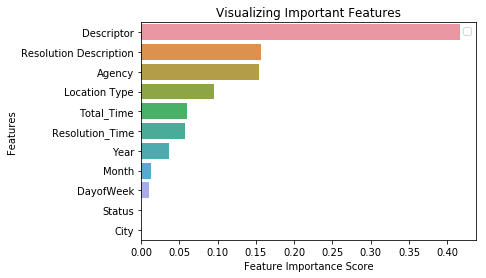

In [74]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Baseline Model : Logistic Regression

In [115]:
train_img, test_img, train_lbl, test_lbl = train_test_split(X, y, test_size=1/7.0, random_state=122)
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [116]:
model = LogisticRegression(solver = 'lbfgs')
model.fit(train_img, train_lbl)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [117]:
import sklearn.metrics as metrics
# use the model to make predictions with the test data
y_pred = model.predict(test_img)
# how did our model perform?
count_misclassified = (test_lbl != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(test_lbl, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 175337
Accuracy: 0.58


####### the above gives the misclassifed samples 
##### Evaluate the model thru Confusion Matrix but here its multi class so hard to understand but lets calculate precision and accuracy

In [118]:
cnf_matrix = metrics.confusion_matrix(test_lbl, y_pred)
cnf_matrix

array([[  1452,   2986,      0,   4227,      0,      0,     49,     18,
           585,      0,   1213,      0,      5,      0,      0,      0,
             0,      0,      0,      0,     27,      0,      0,      9,
             0],
       [  1032,  12218,      0,   8046,      0,      0,    134,    140,
           633,      0,    617,      0,      3,      0,      0,      0,
             0,      0,      0,      0,    580,      0,     16,     17,
             0],
       [     0,      0,     91,      0,      0,     58,      0,     35,
             0,      0,      0,      0,     37,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,     16,
             1],
       [     0,    196,      0,  49057,      0,      2,  10144,      4,
             0,      0,     24,      0,      2,      0,      0,      0,
             0,      0,      0,      0,      8,      0,      0,      0,
             4],
       [     0,      0,      0,      5,     19,     90,      8,    1

We have to take accuracy into consideration as it is very less for our baseline model lets try with random forest classifer as tree based modelsa are robust and works well for classification

In [119]:
np.diag(cnf_matrix)

array([  1452,  12218,     91,  49057,     19,   8834, 112994,   1840,
         1084,   5961,    291,      1,  25117,   6970,      0,      0,
         2399,     60,      0,      0,    429,      8,      1,   3555,
         5039], dtype=int64)

In [120]:
np.sum(cnf_matrix, axis = 0)

array([  9791,  37504,    122,  83431,     23,  10122, 156146,   4851,
         4009,   9557,   4750,      8,  61249,   9193,      4,     90,
         4723,     60,      0,    127,   1220,     32,     19,   5515,
        10211], dtype=int64)

In [121]:
recall = np.mean(np.diag(cnf_matrix) / np.sum(cnf_matrix, axis = 1))

In [122]:
(np.diag(cnf_matrix) / np.sum(cnf_matrix, axis = 0))

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.14829946, 0.32577858, 0.74590164, 0.58799487, 0.82608696,
       0.87275242, 0.72364326, 0.37930324, 0.27039162, 0.6237313 ,
       0.06126316, 0.125     , 0.41008016, 0.75818558, 0.        ,
       0.        , 0.50793987, 1.        ,        nan, 0.        ,
       0.35163934, 0.25      , 0.05263158, 0.64460562, 0.49348742])

In [123]:
precision = np.mean(np.diag(cnf_matrix) / np.sum(cnf_matrix, axis = 0))

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [124]:
print("precision",precision)
print("recall",recall)

precision nan
recall 0.32016765185740736


Accuracy is the main metric for multi class classification as precision and recall scores doesnt play an important role as we are taking aaverage of individual classes (Each complaint Type)

### Random Forests Classification

My favourite is tree based models as they work faster and works well with classification 
Its used to identify feature importance too

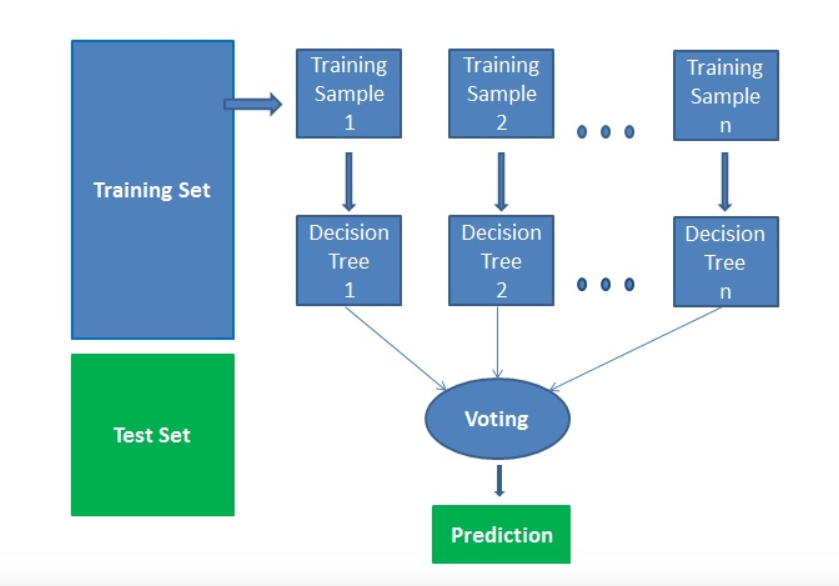

In [125]:
from IPython.display import Image
Image(filename='rf.png')

In [126]:
X = df_model_label[["Agency","Descriptor","Location Type","City","Status","Resolution Description","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]
y = df_model_label["Complaint Type"]

In [127]:
clf=RandomForestClassifier(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9897599187807888


In [128]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 8876


#### Checking if my model is overfitting --- 10 Fold CV

In [129]:
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print(scores)

[0.92721402 0.93180245 0.94418853 0.9381418  0.95293307 0.91729745
 0.90065934 0.90345491 0.9362317  0.92056251]


My number of missclassifed samples are extremely less and thats why accuracy score went up which is good

Ideas!!

How  about holidays and Season? Does these complaints go up or what kind of complaints can be expected


## Season

In [77]:
conditions =[
    (df['Month']==1 )| (df['Month']==12)| (df['Month']==2),
    (df['Month']==3) | (df['Month']==4) | ( df['Month']==5),
    (df['Month']==6) | (df['Month']==7) | (df['Month']==8),
    (df['Month']==9)|(df['Month']==10)| (df['Month']==11),
   ]
choices = ['Winter', 'Spring', 'Summer','Fall']
df['Season']= np.select(conditions, choices, default="black")

In [78]:
df_model = df[["Agency","Descriptor","Complaint Type","Season","Location Type","City","Status","Resolution Description","Latitude","Longitude","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]

In [79]:

label_encoder = LabelEncoder()
df_model['Agency.']=label_encoder.fit_transform(df_model['Agency'])
df_model['Descriptor.']=label_encoder.fit_transform(df_model['Descriptor'])
df_model['City.']=label_encoder.fit_transform(df_model['City'])
df_model['Status.']=label_encoder.fit_transform(df_model['Status'])
df_model['Resolution Description.']=label_encoder.fit_transform(df_model['Resolution Description'])
df_model['Complaint Type.']=label_encoder.fit_transform(df_model['Complaint Type'])
df_model['Location Type.']=label_encoder.fit_transform(df_model['Location Type'])
df_model['Season.']=label_encoder.fit_transform(df_model['Season'])

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopy

No handles with labels found to put in legend.


Descriptor.                0.410824
Resolution Description.    0.152715
Agency.                    0.143866
Location Type.             0.095473
Total_Time                 0.077482
Resolution_Time            0.053670
Year                       0.038494
DayofWeek                  0.012490
Month                      0.010415
Season.                    0.004445
Status.                    0.000102
City.                      0.000024
dtype: float64


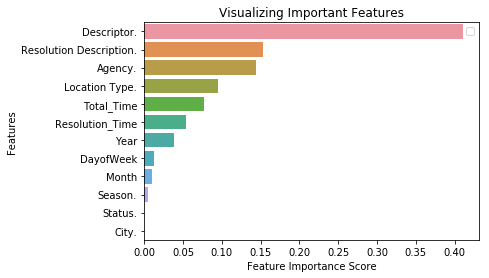

In [133]:
X = df_model[["Agency.","Descriptor.","Location Type.","City.","Status.","Resolution Description.","Season.","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]
y = df_model["Complaint Type."]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
print(feature_imp)

sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Complaints are not dependendant much on Season which makes sense unless you are evaluating specific type of complaintts

Ex: During Christmas we can expect people ordering xmas trees and keeping those large trees on sidewalks
    or
    Water problems in houses during winter liek breaking of pipes due of very cold weathers in NY

In [166]:
X = df_model[["Agency.","Descriptor.","Location Type.","City.","Status.","Resolution Description.","Season.","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]
y = df_model["Complaint Type."]
clf=RandomForestClassifier(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.98745716955664


In [168]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 21538     68      0      6      0      0      0    113      9      0
      75      0      1      0      0    136      0      0     73      0
      28      0      1      0      0]
 [     5  48390      0      3      0      0      0     30    105      0
      11      0      0      0      0     25      0      0     17      0
     143      0    221      0      1]
 [     0      0    463      0      0      0      0      2      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [     0     11      0 124427      0      0      0     36      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0    939      0      0      3      0      0
       0      0      5      0      0      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0  26273      5    950      0      0
       0      0   

In [169]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     22048
           1       0.97      0.99      0.98     48951
           2       1.00      1.00      1.00       465
           3       1.00      1.00      1.00    124474
           4       1.00      0.99      1.00       947
           5       0.95      0.96      0.96     27228
           6       1.00      1.00      1.00    245925
           7       0.96      0.94      0.95     48380
           8       0.99      0.98      0.98     33857
           9       0.99      0.99      0.99     55049
          10       0.99      0.99      0.99     48895
          11       1.00      0.99      1.00       494
          12       0.99      0.98      0.99     77588
          13       0.93      0.95      0.94     15295
          14       0.98      0.93      0.95      4010
          15       0.95      0.99      0.97     11744
          16       0.98      0.99      0.99     27604
          17       1.00    

### The model need to have HIGH precision and HIGH Accuracy so our model is a good one

#### If we can we can try other models too 

But Random forests or tree based models in general are always good for any classification techniques but we can check

#### Trying KNN

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3) # 70% training and 30% test


#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.9820890873221888
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     22195
           1       0.97      0.97      0.97     49580
           2       0.98      1.00      0.99       486
           3       1.00      1.00      1.00    124677
           4       0.98      0.98      0.98       953
           5       0.93      0.97      0.95     27028
           6       1.00      1.00      1.00    245605
           7       0.96      0.92      0.94     47995
           8       0.97      0.97      0.97     33811
           9       0.99      0.98      0.99     55146
          10       0.98      0.99      0.98     48945
          11       0.97      0.98      0.97       519
          12       0.98      0.97      0.98     77352
          13       0.91      0.95      0.93     15431
          14       0.99      0.98      0.98      4128
          15       0.96      0.99      0.98     11901
          16       0.97      0.99      0.98     2738

In [112]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek
0,27842670,2014-04-14 08:16:00,2014-04-24 11:15:00,DEP,Department of Environmental Protection,Water System,Hydrant Knocked Over/Missing (WC),NaN,10017,270 PARK AVENUE,...,Unspecified,MANHATTAN,40.755641,-73.975109,"(40.75564086047822, -73.97510913260558)",10.0,10.0,2014,4,0
1,27842682,2014-04-14 11:38:00,2014-04-15 03:45:00,DEP,Department of Environmental Protection,Water System,No Water/Low Pressure (WA5),NaN,10009,278 EAST 10 STREET,...,Unspecified,MANHATTAN,40.728225,-73.983158,"(40.72822500217204, -73.98315795150333)",0.0,0.0,2014,4,0
2,27842683,2014-04-14 15:13:00,2014-04-21 12:00:00,DEP,Department of Environmental Protection,Air Quality,"Air: Smoke, Vehicular (AA4)",NaN,10003,101 EAST 16 STREET,...,Unspecified,MANHATTAN,40.735867,-73.989153,"(40.73586711990034, -73.98915316963569)",6.0,6.0,2014,4,0
3,27842693,2014-04-14 00:00:00,2014-04-22 00:00:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10162,500 EAST 77 STREET,...,Unspecified,MANHATTAN,40.769974,-73.951186,"(40.769974489179866, -73.95118592429507)",8.0,8.0,2014,4,0
4,27842714,2014-04-14 08:59:00,2014-04-14 12:00:00,DSNY,Manhattan 01,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10013,91 FRANKLIN STREET,...,Unspecified,MANHATTAN,40.718098,-74.004964,"(40.718097970057514, -74.0049638254782)",0.0,0.0,2014,4,0


##### TF IDF

#df_model_model_loctype = df_model[["Agency","Location","Location Type","City","Incident Zip","Latitude","Longitude"]]
# CountVectorizer - Simply, counts word frequencies 
# TFIdf_model - More importance/weights on "rare" words. Less importance/weights on "frequent" words
from sklearn.feature_extraction.text import CountVectorizer, Tfidf_modelVectorizer
# LabelBinarizer - Converts labels into numerical representation "G,B,R" -> [1,2,3]
from sklearn.preprocessing import LabelBinarizer
from scipy.sparse import vstack, hstack, csr_matrix

## APPLYING COUNT VECTORIZATION THAT CONVERTS IT INTO A SPARSE AMTRIX

cv = CountVectorizer(min_df_model=10)
X_ResDes = cv.fit_transform(df_model['Resolution Description'])
X_ResDes

##############################################################################################

#cv = CountVectorizer()
#X_LocType = cv.fit_transform(df_model['Location Type'])
#X_LocType
#################################################################################################

## TF Idf_model Vectorization ----> More importance is given to rare words
## Count Vectorizor --> Gives the frequencies of Words
## Label Binarizer --> Coverts G,B,R --> 1,2,3

################################################################################################

cv = CountVectorizer()
X_Des = cv.fit_transform(df_model['Descriptor'])
#X_sub1 = cv.fit_transform(combined['sub_category_1'])
#X_sub2 = cv.fit_transform(combined['sub_category_2'])
X_Des

###############################################################################################

# Apply TFIdf_model to "resolution_description", 
tv = Tfidf_modelVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_description = tv.fit_transform(df_model['Resolution Description'])

tv = Tfidf_modelVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_descriptor = tv.fit_transform(df_model['Descriptor'])

# Apply LabelBinarizer to "Location Type"
lb = LabelBinarizer(sparse_output=True)
X_Loc = lb.fit_transform(df_model['Location Type'])

# Apply LabelBinarizer to "Location Type"
lb = LabelBinarizer(sparse_output=True)
X_Com = lb.fit_transform(df_model['Complaint Type'])

#####################################################################################################

####### Creating CSR Matrix

####### Merging the Sparse Matrices

# Create our final sparse matrix
X_dummies = csr_matrix(pd.get_dummies(df_model[['Agency','City', 'Status','Latitude',
                                                'Longitude','Total_Time','Resolution_Time',
                                                'Year','Month','DayofWeek']], sparse=True).values)

# Combine everything together
sparse_merge = hstack((X_dummies, X_description, X_descriptor, X_Loc,X_Com)).tocsr()

####################################################################################################

X_train = sparse_merge[:len(df)]

y = sparse_merge[len(df):]

from sklearn.model_selection import KFold
eval_size = .10
kf = KFold(10,shuffle=False)
i = 0
for train_indicies, valid_indicies in kf.split(X_train,y):
    print("TRAIN:", train_indices, "TEST:", test_indices)
    X_train, y_train = X_train[train_indicies], y[train_indicies]
    X_valid, y_valid = X_train[valid_indicies], y[valid_indicies]
    i = i+1


In [ ]:
### Multi Class Text Classification

In [282]:
df2 = pd.read_csv("C:\\EZOIC_ASSESSMENT\\Manhattan.csv",error_bad_lines=False)

In [283]:
df1 = df2.head(60000)

In [284]:
df1.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek
0,27842670,2014-04-14 08:16:00,2014-04-24 11:15:00,DEP,Department of Environmental Protection,Water System,Hydrant Knocked Over/Missing (WC),NaN,10017,270 PARK AVENUE,...,Unspecified,MANHATTAN,40.755641,-73.975109,"(40.75564086047822, -73.97510913260558)",10.0,10.0,2014,4,0
1,27842682,2014-04-14 11:38:00,2014-04-15 03:45:00,DEP,Department of Environmental Protection,Water System,No Water/Low Pressure (WA5),NaN,10009,278 EAST 10 STREET,...,Unspecified,MANHATTAN,40.728225,-73.983158,"(40.72822500217204, -73.98315795150333)",0.0,0.0,2014,4,0
2,27842683,2014-04-14 15:13:00,2014-04-21 12:00:00,DEP,Department of Environmental Protection,Air Quality,"Air: Smoke, Vehicular (AA4)",NaN,10003,101 EAST 16 STREET,...,Unspecified,MANHATTAN,40.735867,-73.989153,"(40.73586711990034, -73.98915316963569)",6.0,6.0,2014,4,0
3,27842693,2014-04-14 00:00:00,2014-04-22 00:00:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10162,500 EAST 77 STREET,...,Unspecified,MANHATTAN,40.769974,-73.951186,"(40.769974489179866, -73.95118592429507)",8.0,8.0,2014,4,0
4,27842714,2014-04-14 08:59:00,2014-04-14 12:00:00,DSNY,Manhattan 01,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10013,91 FRANKLIN STREET,...,Unspecified,MANHATTAN,40.718098,-74.004964,"(40.718097970057514, -74.0049638254782)",0.0,0.0,2014,4,0


In [285]:
df1["Resolution Description"]= df1["Resolution Description"].astype(str)
def remove_digits(x):
    x = ''.join([i for i in x if not i.isdigit()])
    return x

import string
def remove_punctuation(sentence: str) -> str:
    return sentence.translate(str.maketrans('', '', string.punctuation))

import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')

def remove_stop_words(x):
    x = ' '.join([i for i in x.lower().split(' ') if i not in stop])
    return x

def to_lower(x):
    return x.lower()


from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pavani.nrusimhadevar\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavani.nrusimhadevar\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


In [286]:
df1['Resolution Description'] = df1['Resolution Description'].apply(remove_stop_words)
df1['Resolution Description'] = df1['Resolution Description'].apply(remove_digits)
df1['Resolution Description'] = df1['Resolution Description'].apply(remove_punctuation)
df1['Resolution Description']= df1['Resolution Description'].apply(porter.stem)
df1['Resolution Description']= df1['Resolution Description'].apply(porter.stem)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [287]:
df1["Descriptor"]= df1["Descriptor"].astype(str) 
df1['Descriptor'] = df1['Descriptor'].apply(remove_stop_words)
df1['Descriptor'] = df1['Descriptor'].apply(remove_digits)
df1['Descriptor'] = df1['Descriptor'].apply(remove_punctuation)
porter = PorterStemmer()

df1['Descriptor']= df1['Descriptor'].apply(porter.stem)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [288]:
df1= df1[df1['Resolution Description'].notnull()]

In [276]:
sample = df1[['Resolution Description','Descriptor','Agency']]

In [289]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(sample.to_dict(orient='records')).toarray()
final_features.shape

AttributeError: 'dict' object has no attribute 'lower'

In [257]:
X = df1['Resolution Description']
y = df1['Complaint Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [258]:
import pickle
# instead of doing these steps one at a time, we can use a pipeline to complete then all at once
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', RandomForestClassifier())])

# fitting our model and save it in a pickle for later use
model = pipeline.fit(X_train, y_train)
with open('RandomForest.pickle', 'wb') as f:
    pickle.dump(model, f)

ytest = np.array(y_test)

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
 

                                         precision    recall  f1-score   support

                              APPLIANCE       0.00      0.00      0.00       184
                         Adopt-A-Basket       0.00      0.00      0.00         2
                            Air Quality       0.00      0.00      0.00       350
                           Animal Abuse       0.00      0.00      0.00         1
                               Asbestos       1.00      0.96      0.98        57
                       BEST/Site Safety       0.00      0.00      0.00        12
                       Blocked Driveway       0.40      1.00      0.57         2
                                Boilers       0.00      0.00      0.00        25
                      Broken Muni Meter       0.78      0.78      0.78         9
                           Building/Use       0.67      0.01      0.03       135
             Bus Stop Shelter Complaint       1.00      1.00      1.00         2
                 Collection

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...  25   0   1]
 [  0   0   0 ...   0  12   0]
 [  0   0   0 ...   0   0 808]]


In [259]:
print('accuracy %s' % accuracy_score(model.predict(X_test), ytest))

accuracy 0.5666111111111111


In [ ]:
### 

In [261]:
df = pd.read_csv("C:\\EZOIC_ASSESSMENT\\Manhattan.csv",error_bad_lines=False)
df.head()

df = df[pd.notnull(df['Resolution Description'])]

col = ['Descriptor', 'Resolution Description', 'Agency']
df = df[col]
df.columns = ['Descriptor', 'Resolution Description' , 'Agency']

df['category_id'] = df['Descriptor'].factorize()[0]
from io import StringIO
category_id_df = df[['Descriptor', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Descriptor']].values)

In [262]:
df = df[:10000]

df.head(5)

,Descriptor,Resolution Description,Agency,category_id
0,Hydrant Knocked Over/Missing (WC),The Department of Environmental Protection inv...,DEP,0
1,No Water/Low Pressure (WA5),The Department of Environment Protection inspe...,DEP,1
2,"Air: Smoke, Vehicular (AA4)",The Department of Environmental Protection did...,DEP,2
3,Rat Sighting,The Department of Health and Mental Hygiene wi...,DOHMH,3
4,15 Street Cond/Dump-Out/Drop-Off,The Department of Sanitation investigated this...,DSNY,4


In [264]:
import re
from nltk.corpus import stopwords
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

def preprocess(raw_text):

    # keep only words
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split 
    words = letters_only_text.lower().split()

    # remove stopwords
    stopword_set = set(stopwords.words("english"))
    meaningful_words = [w for w in words if w not in stopword_set]
    
    #stemmed words
    ps = PorterStemmer()
    stemmed_words = [ps.stem(word) for word in meaningful_words]
    
    #join the cleaned words in a list
    cleaned_word_list = " ".join(stemmed_words)

    return cleaned_word_list

In [265]:
df['Resolution Description'] = df['Resolution Description'].apply(lambda line : preprocess(line))

In [266]:
stemmer = PorterStemmer()

def split_dataset_into_words(dataset):
    datawords = dataset.apply(lambda x: x.split())
    return list(datawords)

#  my_list = all_incidents 
# dictionnary
def buffer_stemmisation_keywords(my_list):
    my_list = [item for sublist in my_list for item in sublist]
    aux = pd.DataFrame(my_list, columns =['word'] )
    aux['word_stemmed'] = aux['word'].apply(lambda x : stemmer.stem(x))
    aux = aux.groupby('word_stemmed').transform(lambda x: ', '.join(x))
    aux['word_stemmed'] = aux['word'].apply(lambda x : stemmer.stem(x.split(',')[0]))
    aux.index = aux['word_stemmed']
    del aux['word_stemmed']
    my_dict = aux.to_dict('dict')['word']
    return my_dict

In [267]:
dictionnary_all_words_unstemmed = buffer_stemmisation_keywords(split_dataset_into_words(df['Resolution Description']))

# Dictionnary de-duplicated
for key, value in dictionnary_all_words_unstemmed.items():
    new_value = value.replace(",", "")
    new_value = list(set(value.split()))
    new_value = list(set(map(lambda each:each.strip(","), new_value)))
    dictionnary_all_words_unstemmed[key]=new_value

In [268]:
dictionnary_all_words_unstemmed

{'depart': ['depart'],
 'environ': ['environment', 'environ'],
 'protect': ['protect'],
 'investig': ['investig'],
 'complaint': ['complaint'],
 'repair': ['repair'],
 'replac': ['replac'],
 'hydrant': ['hydrant'],
 'inspect': ['inspect'],
 'could': ['could'],
 'find': ['find'],
 'problem': ['problem'],
 'report': ['report'],
 'condit': ['condit'],
 'persist': ['persist'],
 'plea': ['pleas'],
 'call': ['call'],
 'non': ['non'],
 'new': ['new'],
 'york': ['york'],
 'citi': ['citi'],
 'area': ['area'],
 'code': ['code'],
 'detail': ['detail'],
 'inform': ['inform'],
 'submit': ['submit'],
 'observ': ['observ'],
 'violat': ['violat'],
 'air': ['air'],
 'noi': ['nois'],
 'time': ['time'],
 'issu': ['issu'],
 'notic': ['notic'],
 'still': ['still'],
 'exist': ['exist'],
 'file': ['file'],
 'outsid': ['outsid'],
 'health': ['health'],
 'mental': ['mental'],
 'hygien': ['hygien'],
 'review': ['review'],
 'determin': ['determin'],
 'appropri': ['appropri'],
 'action': ['action'],
 'type': ['ty

In [270]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['Resolution Description'], df['Descriptor'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [271]:

# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df['Resolution Description'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)